### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [4]:
import numpy as np
m = np.arange(12).reshape((3,4))
print("Overall dimension",m.shape,"with {} rows".format(m.shape[0]), "and with {} columns.".format(m.shape[1]))

Overall dimension (3, 4) with 3 rows and with 4 columns.


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
import numpy as np
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
#a)
print(np.outer(u,v))
#b)
t=np.array([(i*j) for i in u for j in v]).reshape(len(u),len(v))
print(t)
#c)
print(u.reshape(4,1)*v)


[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [26]:
import numpy as np
import numpy.random as npr

a=npr.rand(10,6)
mask=(a<0.1)
a[mask]=0
print(a)

[[0.99419111 0.97848299 0.         0.23772731 0.         0.        ]
 [0.63788039 0.         0.2887605  0.67165072 0.5622445  0.98528196]
 [0.52489701 0.1946141  0.15121846 0.21731996 0.60974325 0.6232687 ]
 [0.42688571 0.         0.30368347 0.         0.31281645 0.21007431]
 [0.89539396 0.17028794 0.3199478  0.63550342 0.78396444 0.27729806]
 [0.75747946 0.         0.54232089 0.10558025 0.13049798 0.94807678]
 [0.5502631  0.60648649 0.69115228 0.21665491 0.82833389 0.44607444]
 [0.34492516 0.32988791 0.57385324 0.21326511 0.80395678 0.67446403]
 [0.52690429 0.34665669 0.4025543  0.98858413 0.         0.16234151]
 [0.45778432 0.54545581 0.72915652 0.39828707 0.         0.64299553]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

The points where sine and cosine are near are: [0.75398224 0.81681409 3.83274304 3.89557489]


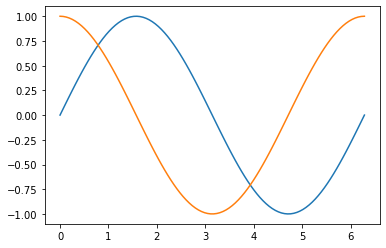

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 2*np.pi, 100)
#reverse(changing order of element in the array)
a=xs[::-1]
#print(a)
#looking for x such as sine(x) is close to cosine(x) 
l=[]
Sin = np.sin(xs)
Cos = np.cos(xs)
for i,j in enumerate(Sin):
    if (Sin[i]-Cos[i]<0.1 and Sin[i]-Cos[i]>-0.1):
        l.append(i)
Near=np.array(l)
print("The points where sine and cosine are near are:",Near/100*2*np.pi)
plt.plot(xs,Sin,xs,Cos,)

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
import numpy as np

#array definition
a=np.array([(i*j) for i in range(1,11) for j in range(1,11)])
b=a.reshape(10,10) 
#print(b)
#computation of requested quantities
trace=0
antodiagonal=()
offset=()
for i in range(0,10):
    trace+=b[i][i]
    antodiagonal+=(b[9-i][i],)
    if i>0:
        offset+=(b[i][i-1],)
print(trace)
print(antodiagonal)
print(offset)



385
(10, 18, 24, 28, 30, 30, 28, 24, 18, 10)
(2, 6, 12, 20, 30, 42, 56, 72, 90)


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
import numpy as np
import math as m
Miles=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
#building the distance table
TabMiles=np.array([(m.fabs(i-j))for i in Miles for j in Miles])
#converting in a reasonable unit of measure
TabKM=TabMiles*1.60934
print(TabMiles.reshape(len(Miles),len(Miles)))
#print(TabKM.reshape(len(Miles),len(Miles)))


[[   0.  198.  303.  736.  871. 1175. 1475. 1544. 1913. 2448.]
 [ 198.    0.  105.  538.  673.  977. 1277. 1346. 1715. 2250.]
 [ 303.  105.    0.  433.  568.  872. 1172. 1241. 1610. 2145.]
 [ 736.  538.  433.    0.  135.  439.  739.  808. 1177. 1712.]
 [ 871.  673.  568.  135.    0.  304.  604.  673. 1042. 1577.]
 [1175.  977.  872.  439.  304.    0.  300.  369.  738. 1273.]
 [1475. 1277. 1172.  739.  604.  300.    0.   69.  438.  973.]
 [1544. 1346. 1241.  808.  673.  369.   69.    0.  369.  904.]
 [1913. 1715. 1610. 1177. 1042.  738.  438.  369.    0.  535.]
 [2448. 2250. 2145. 1712. 1577. 1273.  973.  904.  535.    0.]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [9]:
import numpy as np
import math as m


def Primes(N):
    candidates=np.arange(1,N)
    for i in candidates:
        if(i==1):
            continue
        for j in range(2,N):#not 1, it would check if N==N*1, always true
            if i*j>N:
                break
            mask=(candidates==(i*j))
            candidates[candidates==(i*j)]=N+1#push not primes out of range
    chosen=candidates<N #keeping only the one in the range
    return candidates[chosen]

print(Primes(99))
#%timeit Primes(99)
#%timeit Primes(500)
#%timeit Primes(999)
#%timeit Primes(5000)
#%timeit Primes(9999)
#performances seem to scale parabolically (t goes like N^2), since the number of element to check go like N
#as well as the multiples to compute

def Eratosthenes(N):
    candidates=np.full(N,True)#creates array of  True, works only for NumPy>1.8  
    for i in range(2,N):
        if(i>m.sqrt(N)):
            break
        if(candidates[i]==True):
            for j in range(i**2,N,i):
                candidates[j]=False
    chosen=np.array([i for i in range(2,N) if candidates[i]==True])
    return np.concatenate((np.array([1]),chosen))
print(Eratosthenes(99))
#%timeit Eratosthenes(99)

[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]
[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

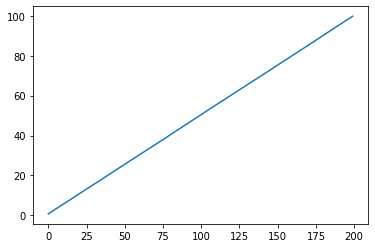

In [10]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

Walk=np.zeros((1000,200))
Paths=npr.randint(-1,1,size=(1000,200))
#time evolution, every i is a "path-time"
for i in range(0,200):
    if i==0:
        for j in range(0,1000):
            Walk[j][0]=Paths[j][0]#start from 0 and add first path
    for j in range(0,1000):
            Walk[j][i]=Walk[j][i-1]+Paths[j][i]#start from previuos position and add path
#computation of average distances and plots
Walk=Walk*Walk
Means=np.array(Walk.mean(axis=0))
Distances=np.sqrt(Means)
time=np.arange(200)
plt.plot(time,Distances)
#the quadratic mean distance of a brownian regime is supposed to be directly proportional to the time
#so the result are in agreement with the theory
#while the line seem perfect, printing the distances show it is not so, so indeed we have just good statistics
#and the data are "not" rigged

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

Hares: Mean 34080.95238095238 ,standard deviation 20897.906458089667
max population: 77400.0 min population: 7600.0 

Lynxes: Mean 20166.666666666668 ,standard deviation 16254.591536908763
max population: 59400.0 min population: 4000.0 

Carrots: Mean 42400.0 ,standard deviation 3322.5062255844787
max population: 48300.0 min population: 36700.0 

In year 1900.0 the population with biggest population was the carrots' one
In year 1901.0 the population with biggest population was the carrots' one
In year 1902.0 the population with biggest population was the hares' one
In year 1903.0 the population with biggest population was the hares' one
In year 1904.0 the population with biggest population was the lynxes' one
In year 1905.0 the population with biggest population was the lynxes' one
In year 1906.0 the population with biggest population was the carrots' one
In year 1907.0 the population with biggest population was the carrots' one
In year 1908.0 the population with biggest population was

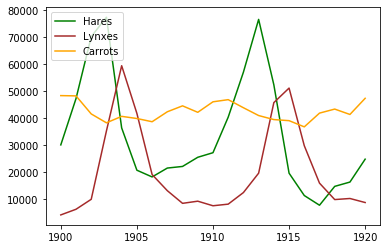

In [17]:
import numpy as np
import matplotlib.pyplot as plt
#! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
%matplotlib inline

#getting the data
Data=np.loadtxt("populations.txt",skiprows=1)
Years=Data[:,0]
Hares=Data[:,1]
Lynxes=Data[:,2]
Carrots=Data[:,3]

#plots
plt.plot(Years,Hares,color="green",label="Hares")
plt.plot(Years,Lynxes,color="brown",label="Lynxes")
plt.plot(Years,Carrots,color="orange",label="Carrots")
plt.xticks([1900+5*k for k in range(0,5)])#I didn't like xlabels like 1902.5 appearing by default
plt.legend(loc="upper left")

#really basic statistical analysis
print("Hares: Mean",Hares.mean(),",standard deviation",Hares.std())
print("max population:",Hares.max(),"min population:",Hares.min(),'\n')
print("Lynxes: Mean",Lynxes.mean(),",standard deviation",Lynxes.std())
print("max population:",Lynxes.max(),"min population:",Lynxes.min(),'\n')
print("Carrots: Mean",Carrots.mean(),",standard deviation",Carrots.std())
print("max population:",Carrots.max(),"min population:",Carrots.min(),'\n')

#max population for each year
for i in range(0,len(Years)):
    if Hares[i]>Lynxes[i] and Hares[i]>Carrots[i]:
        print("In year", Years[i],"the population with biggest population was the hares' one")
    if Lynxes[i]>Hares[i] and Lynxes[i]>Carrots[i]:
        print("In year", Years[i],"the population with biggest population was the lynxes' one")
    if Carrots[i]>Lynxes[i] and Carrots[i]>Hares[i]:
        print("In year", Years[i],"the population with biggest population was the carrots' one")
#as pointed out by the article, the populations are linked by the prey-predator relation